# Voxelization Workshop

In this workshop we will learn how to voxelize a geometry and construct a lattice from it.


### 0. Initialization
Importing all necessary libraries and specifying the inputs

In [1]:
#!conda env update -f ../environment.yml

In [2]:
import os
import topogenesis as tg
import trimesh as tm
import numpy as np
import pyvista as pv


## Parameter Settings


In [3]:
vs_x = 3.6
vs_y = 3.6
vs_z = 3.6
unit = [vs_x, vs_y, vs_z]


## 1. Input Mesh

In [4]:
mesh_path = os.path.relpath('../data/raw data/optional_envelope.obj')
# load the mesh from file
mesh = tm.load(mesh_path)
# Check if the mesh is watertight
print(mesh.is_watertight)

True


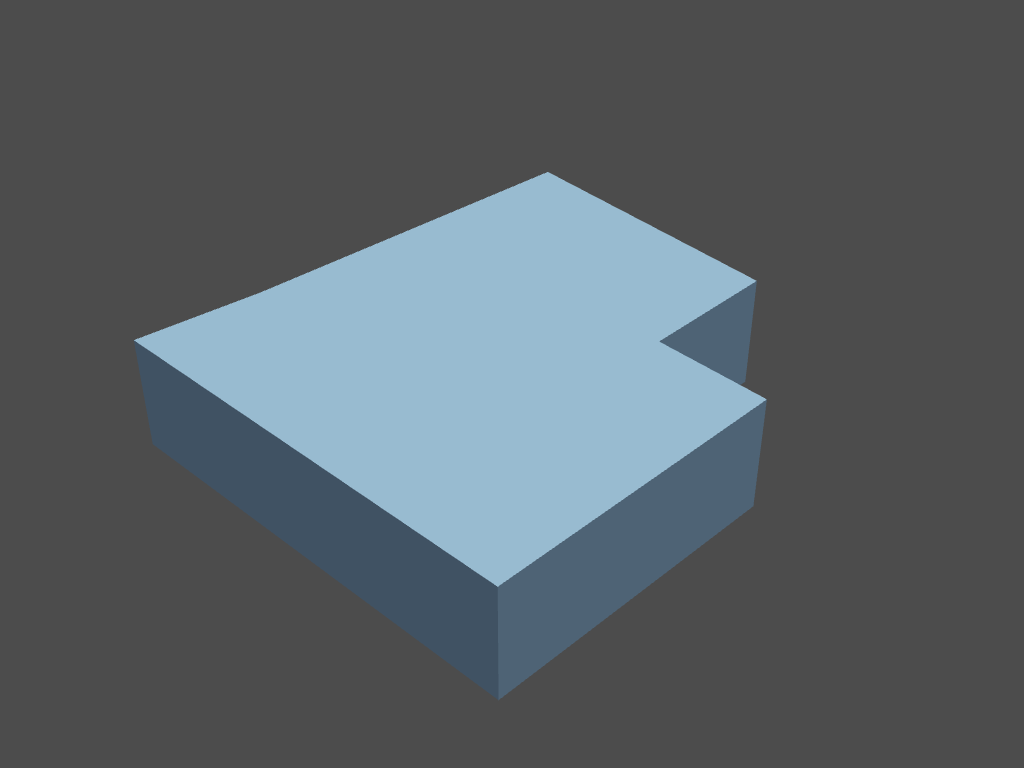

[(270.6256981964618, 188.66349034646183, 253.14770129646183),
 (35.4779969, -46.484210950000005, 18.0),
 (0.0, 0.0, 1.0)]

In [5]:
# convert trimesh to pv_mesh
def tri_to_pv(tri_mesh):
    faces = np.pad(tri_mesh.faces, ((0, 0),(1,0)), 'constant', constant_values=3)
    pv_mesh = pv.PolyData(tri_mesh.vertices, faces)
    return pv_mesh

# Visualize the mesh using pyvista plotter
#######

# initiating the plotter
p = pv.Plotter()

# adding the base mesh: light blue
p.add_mesh(tri_to_pv(mesh), color='#abd8ff')

# plotting
p.show()

## 2. Voxelize the Mesh

In [6]:
# initialize the base lattice
base_lattice = tg.lattice(mesh.bounds, unit=unit, default_value=1, dtype=int)

# check which voxel centroids is inside the mesh
interior_condition = mesh.contains(base_lattice.centroids)

# reshape the interior condition to the shape of the base_lattice
interior_array = interior_condition.reshape(base_lattice.shape)

# convert the interior array into a lattice
interior_lattice = tg.to_lattice(interior_array, base_lattice.minbound, base_lattice.unit)


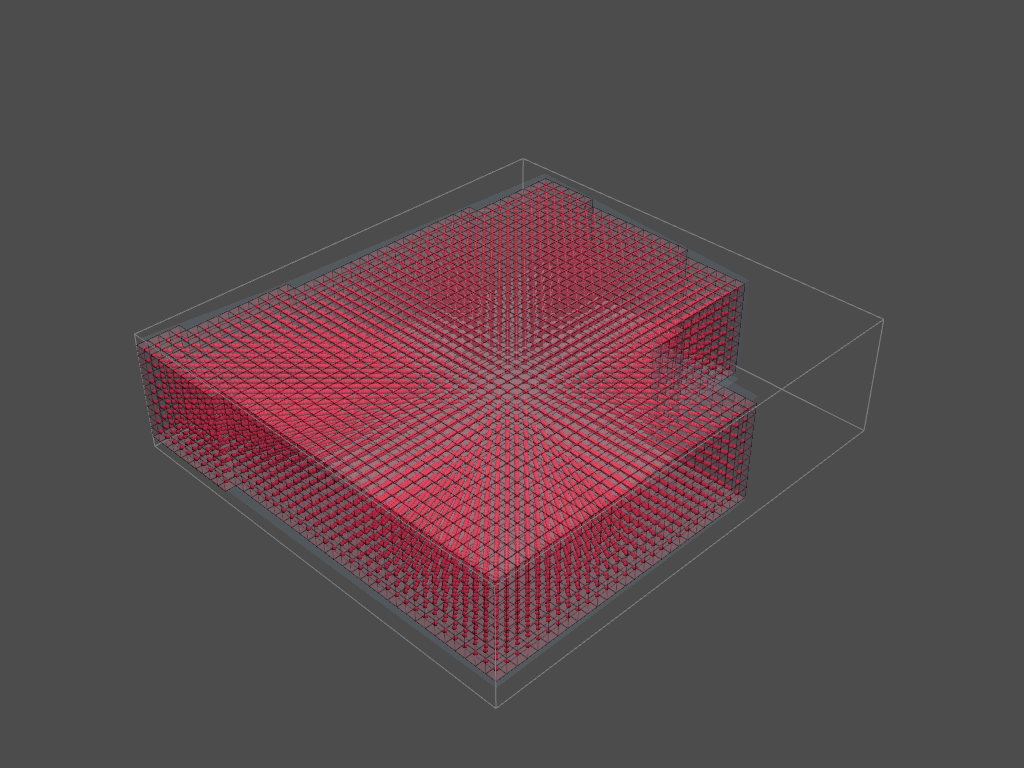

[(275.910778145043, 194.91077814504303, 257.91077778741516),
 (36.0, -45.0, 17.99999964237213),
 (0.0, 0.0, 1.0)]

In [7]:
# convert trimesh to pv_mesh
def tri_to_pv(tri_mesh):
    faces = np.pad(tri_mesh.faces, ((0, 0),(1,0)), 'constant', constant_values=3)
    pv_mesh = pv.PolyData(tri_mesh.vertices, faces)
    return pv_mesh

# initiating the plotter
p = pv.Plotter()

# fast visualization of the lattice
interior_lattice.fast_vis(p)

# adding the base mesh: light blue
p.add_mesh(tri_to_pv(mesh), color='#abd8ff', opacity=0.1)

# plotting
p.show()

## 3. Saving the lattice to CSV

In [8]:
csv_path = os.path.relpath('../data/dynamic output/voxelized_envelope.csv')
interior_lattice.to_csv(csv_path)

### Credits

In [9]:
__author__ = "Shervin Azadi"
__license__ = "MIT"
__version__ = "1.0"
__url__ = "https://github.com/shervinazadi/spatial_computing_workshops"
__summary__ = "Spatial Computing Design Studio Workshop on Voxelization"